# Dealing With Categorical Data


- Sickit Learn will not accept categorical features by default
- Need to convert the data into binary values 
    - 0 observation was of that category
    - 1 it was not of that category

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
music_df = pd.read_csv('high_popularity_spotify_data.csv')

In [28]:
music_df.columns

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='str')

<Figure size 1200x600 with 0 Axes>

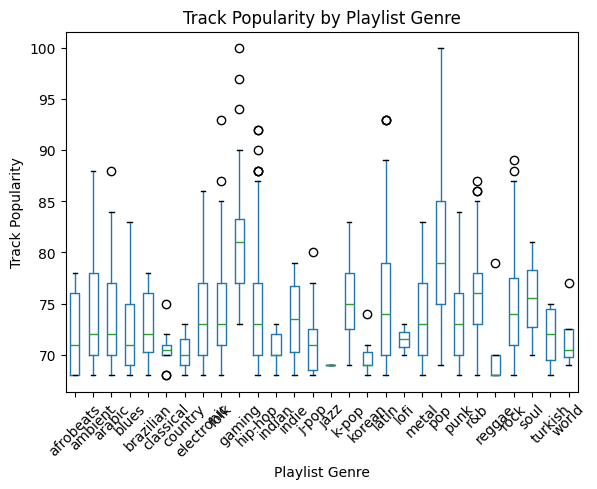

In [29]:
plt.figure(figsize=(12,6))

music_df.boxplot(
    column='track_popularity',
    by='playlist_genre',
    grid=False
)

plt.title('Track Popularity by Playlist Genre')
plt.suptitle('')   # removes automatic pandas title
plt.xlabel('Playlist Genre')
plt.ylabel('Track Popularity')
plt.xticks(rotation=45)

plt.show()

In [30]:
music_dummies = pd.get_dummies(music_df['playlist_genre'],drop_first=True)
print(music_dummies.head())

music_dummies = pd.concat([music_df,music_dummies],axis=1)
music_dummies = music_dummies.drop('playlist_genre',axis=1)

print(music_dummies.head())

   ambient  arabic  blues  brazilian  classical  country  electronic   folk  \
0    False   False  False      False      False    False       False  False   
1    False   False  False      False      False    False       False  False   
2    False   False  False      False      False    False       False  False   
3    False   False  False      False      False    False       False  False   
4    False   False  False      False      False    False       False  False   

   gaming  hip-hop  ...   lofi  metal   pop   punk    r&b  reggae   rock  \
0   False    False  ...  False  False  True  False  False   False  False   
1   False    False  ...  False  False  True  False  False   False  False   
2   False    False  ...  False  False  True  False  False   False  False   
3   False    False  ...  False  False  True  False  False   False  False   
4   False    False  ...  False  False  True  False  False   False  False   

    soul  turkish  world  
0  False    False  False  
1  False    Fa

# Linear Regression with dummy variables

In [38]:
from sklearn.model_selection import cross_val_score , KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

drop_cols = [
    'track_artist',
    'track_name',
    'track_album_name',
    'playlist_name',
    'track_href',
    'uri',
    'analysis_url',
    'track_id',
    'id',
    'playlist_id',
    'type',
    'track_artist',
    'track_album_name',
    'playlist_name',
    'track_href',
    'uri',
    'track_album_release_date',
    'track_album_id',
    'playlist_subgenre'
]

music_clean = music_dummies.drop(columns=drop_cols)

feature = music_clean.drop('track_popularity',axis=1).values
target = music_clean['track_popularity'].values


X_train , X_test , y_train , y_test = train_test_split(feature,target,test_size=0.2,random_state=42)

kf = KFold(n_splits=5,shuffle=True,random_state=42)
linReg = LinearRegression()
linReg_cv = cross_val_score(linReg,X_train,y_train,cv=kf,scoring="neg_mean_squared_error")
print(np.sqrt(-linReg_cv))


[4.98049317 5.74701628 5.69964156 5.23603567 5.53363924]


# Missing Data
- No value for a feature in a particular row 
- This can occur because
    - There have been no observation 
    - The data might be currupt 
    - We need to deal with missing data

In [39]:
print(music_df.isna().sum().sort_values())

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
playlist_name               0
analysis_url                0
track_id                    0
acousticness                0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
playlist_id                 0
id                          0
playlist_subgenre           0
type                        0
track_album_name            1
dtype: int64


# Drop missing Values

In [41]:
music_df = music_df.dropna(subset=['playlist_genre','loudness','liveness','energy','track_album_name'])
print(music_df.isna().sum().sort_values())

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            0
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
dtype: int64
